In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
from matplotlib import colors as mcolors
colours = list(mcolors.TABLEAU_COLORS.values()) + ["red", "green", "blue", "gold", "black", "yellow"]

In [3]:
def getData(db, model="sg-cgan"):
    rDir = ""
    if db == "HouseA":
        rDir = "../../Dataset/House/HouseA.feat"
    elif db == "CASAS":
        rDir = '../../Dataset/twor.2009/annotated.feat.ch1'
    elif db == "PAMAP":
        rDir = '../../Dataset/PAMAP2/pamap.feat'
    elif db == "DSADS":
        rDir = '../../Dataset/DSADS/dsads.feat'
    else:
        raise Exception("Unknown dataset")
        
    fDir = '../../Results/'+db+'/exp_generated_sample/t0-m'+model+'0-sample.feat'    
    realData = pd.read_csv(rDir)
    fakeData = pd.read_csv(fDir)

    return realData, fakeData

In [14]:
def plotPCA(X, y, labels=["Real", "Generated"], lim=None, filename="plot.pdf"):
    if (X is None) or (y is None):
        return 
    
    fout = plt.figure()
    np.random.seed(0)
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams.update({'font.size': 28})
    plt.rcParams['axes.titlepad'] = 20 
    
    label_colours = ["red", "blue", "orange", "green", "purple"]

    for i, cid in enumerate(labels):
        px = X[(y==cid)]
        if lim is not None:
            plt.xlim(lim[0], lim[1])
            plt.ylim(lim[0], lim[1])
        plt.scatter(px[:, 0], px[:, 1], c=label_colours[i], label=cid)
        
    plt.legend(prop={'size': 35}, markerscale=3)
    plt.show()
    fout.savefig(filename, bbox_inches='tight')

In [7]:
from sklearn.decomposition import PCA

def runPCA(cls, data, labels):
    np.random.seed(0)
    
    print(cls, [len(d) for d in data])
    trainWith = None
    X = None
    for i in range(len(data)):
        d = data[i]
    
        if cls is not None:
            d = d[d["ActivityName"]==cls]
                
        d["label"] = labels[i]

#         if len(d) > 2000:
#             d = d.sample(n=2000)
        
        if len(d) == 0:
            X = None
            break
            
        if X is None:
            X = d
            trainWith = d
        else:
            X = pd.concat([X, d])
            
    if X is None:
        return None, None, None
    
    X = X.sample(frac=1).reset_index(drop=True)
    
    y = X["label"]
    X = X.drop('ActivityName', 1)
    X = X.drop('label', 1)
    
    trainWith = trainWith.drop('ActivityName', 1)
    trainWith = trainWith.drop('label', 1)

#     tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
    pca = PCA(n_components=2)
    pca.fit(trainWith)
    _X = pca.transform(X)
    
    return _X, y, X


# HouseA

In [37]:
realData, fakeData = getData("HouseA")
# if len(fakeData) > len(realData):
#     fakeData = fakeData.sample(n=min(2*len(realData), len(fakeData)))
    
X, y, _ = runPCA(None, [realData, fakeData], ["Real", "Generated"])

None [505, 5000]


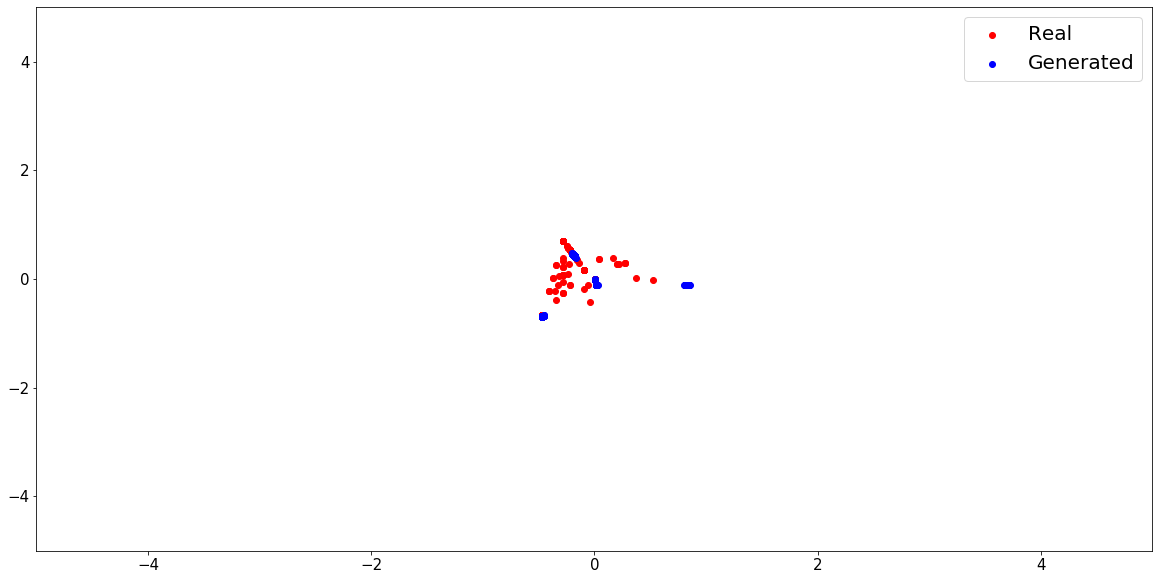

In [38]:
plotPCA(X, y, lim=[-5, 5])

Cleaning [17870, 9269]
R1_bed_to_toilet [17870, 9269]


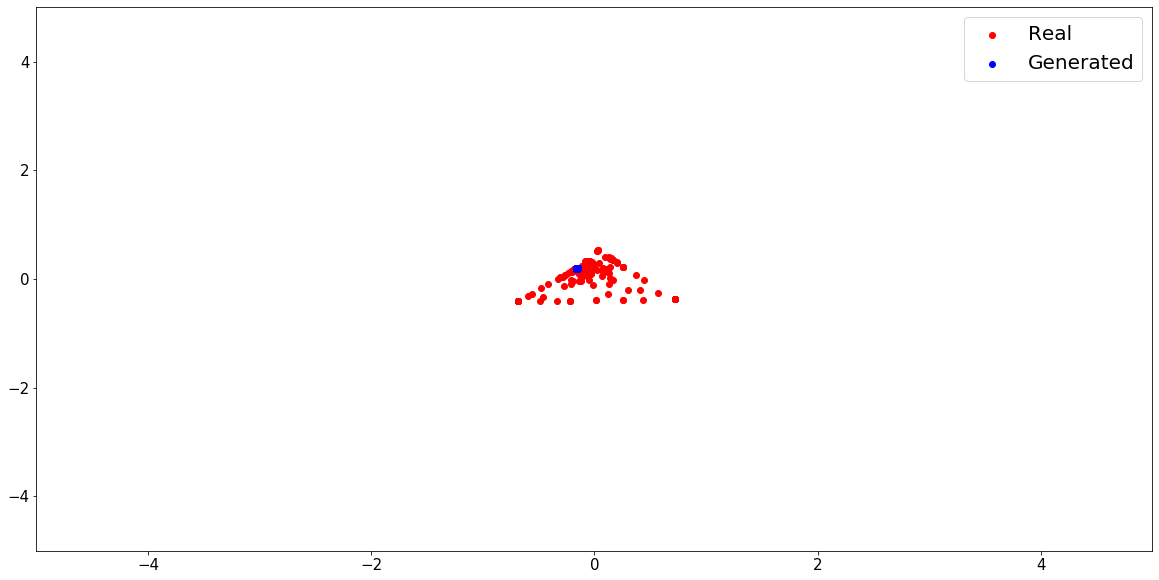

R1_breakfast [17870, 9269]
R1_groom [17870, 9269]
R1_sleep [17870, 9269]


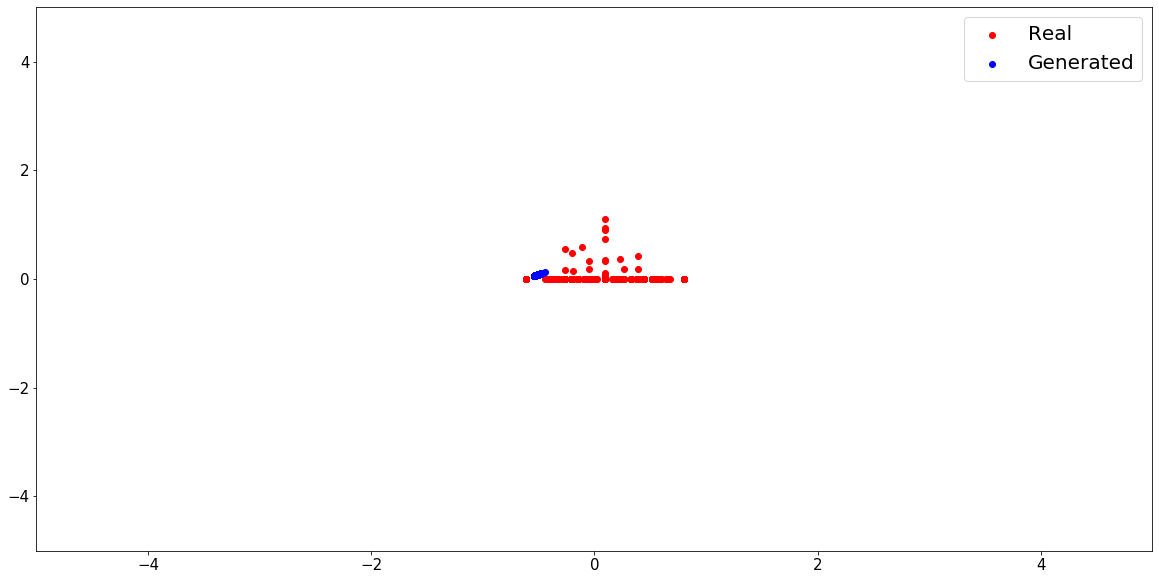

R1_work_at_computer [17870, 9269]


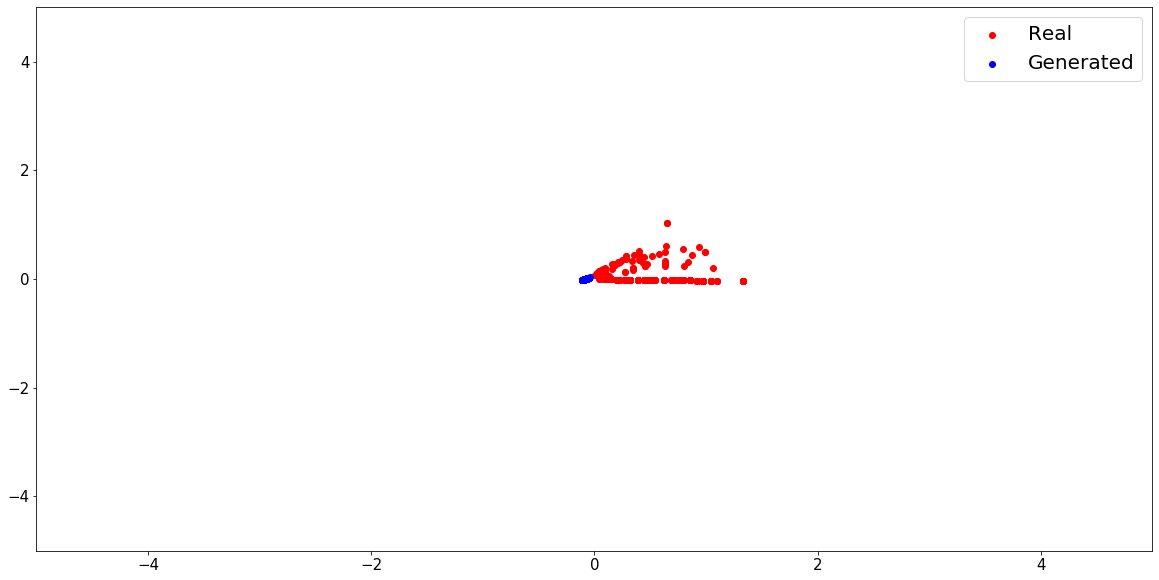

R1_work_at_dining_room_table [17870, 9269]


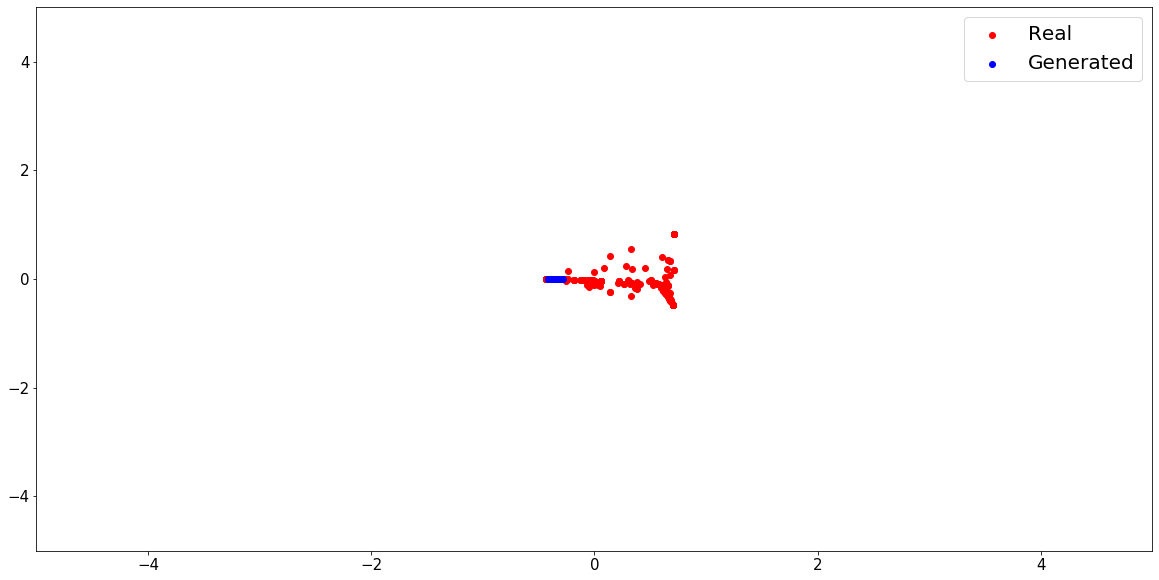

R2_bed_to_toilet [17870, 9269]


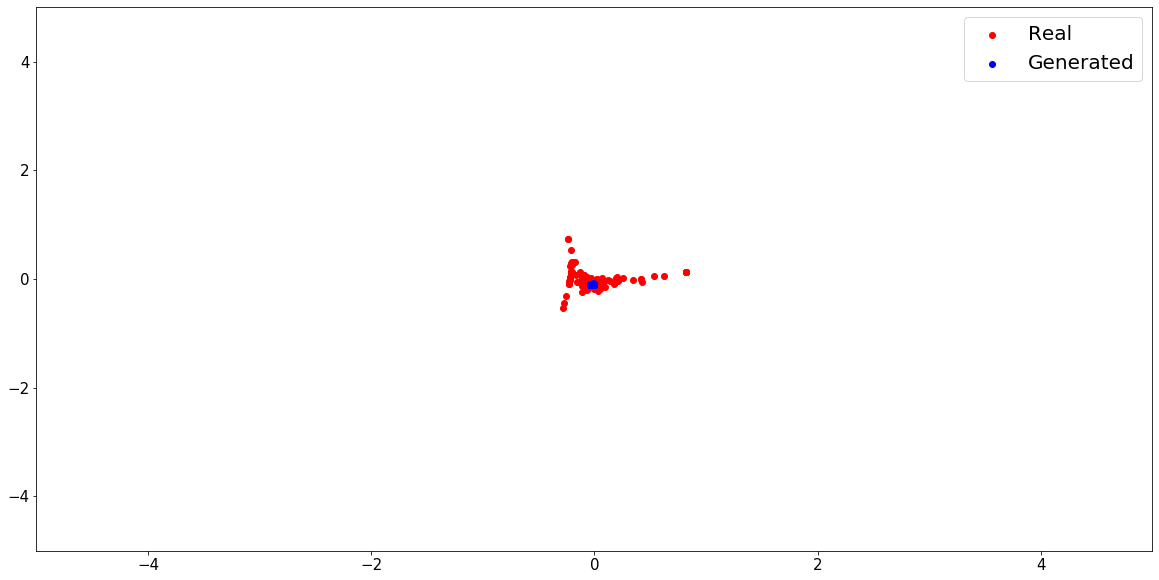

R2_breakfast [17870, 9269]
R2_groom [17870, 9269]
R2_prepare_dinner [17870, 9269]


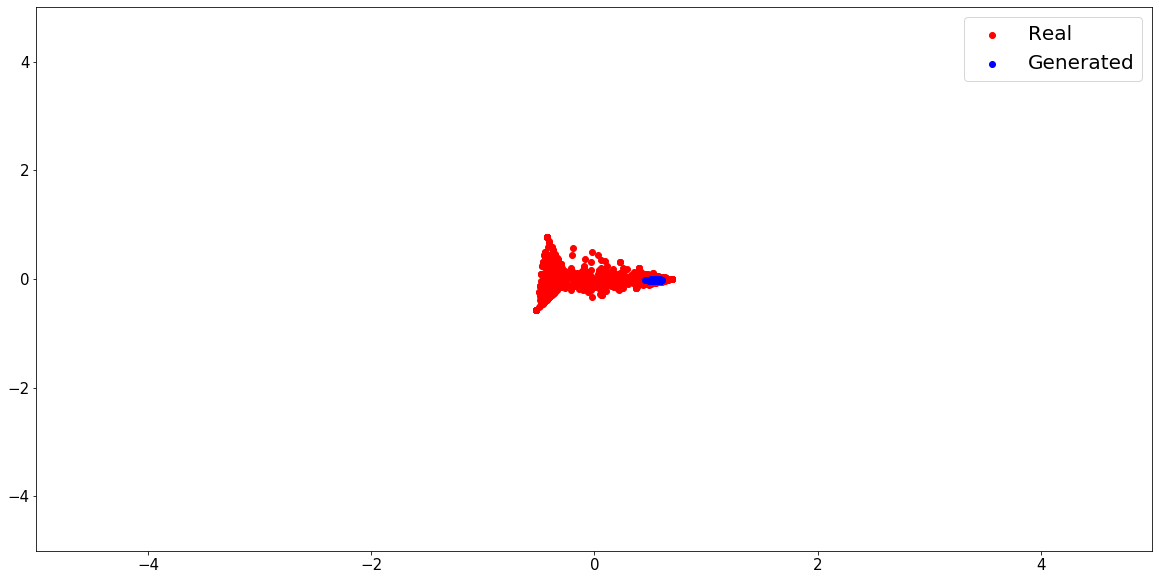

R2_prepare_lunch [17870, 9269]


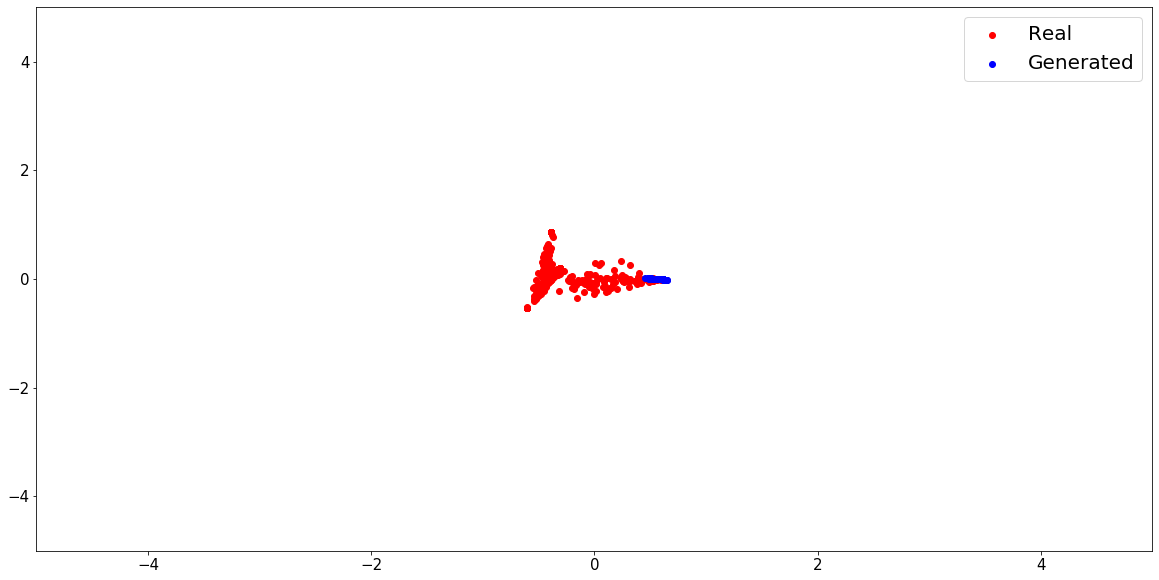

R2_sleep [17870, 9269]


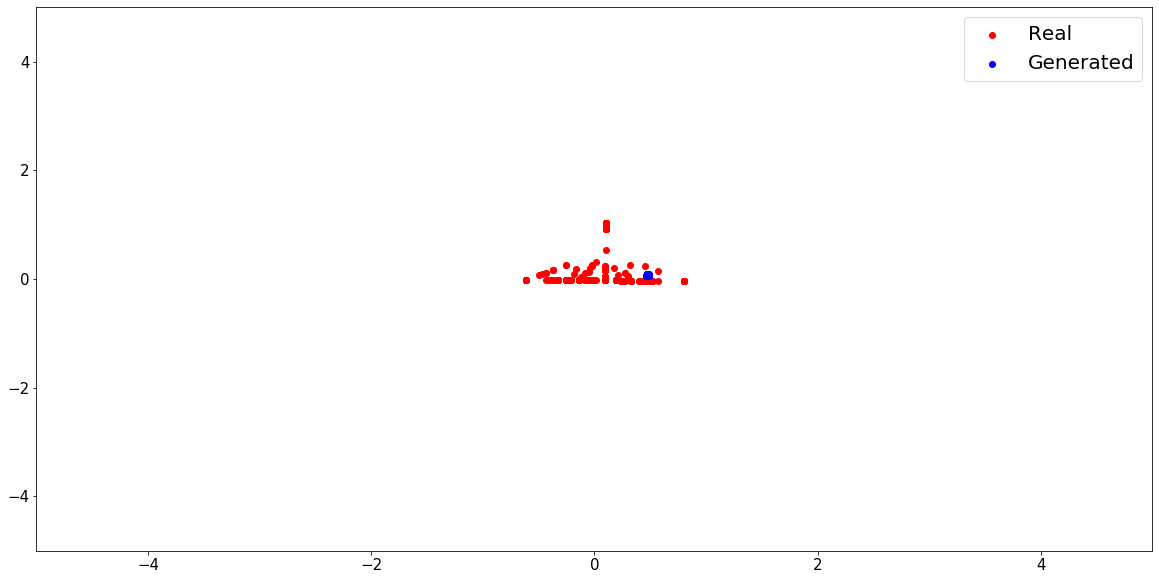

R2_watch_TV [17870, 9269]


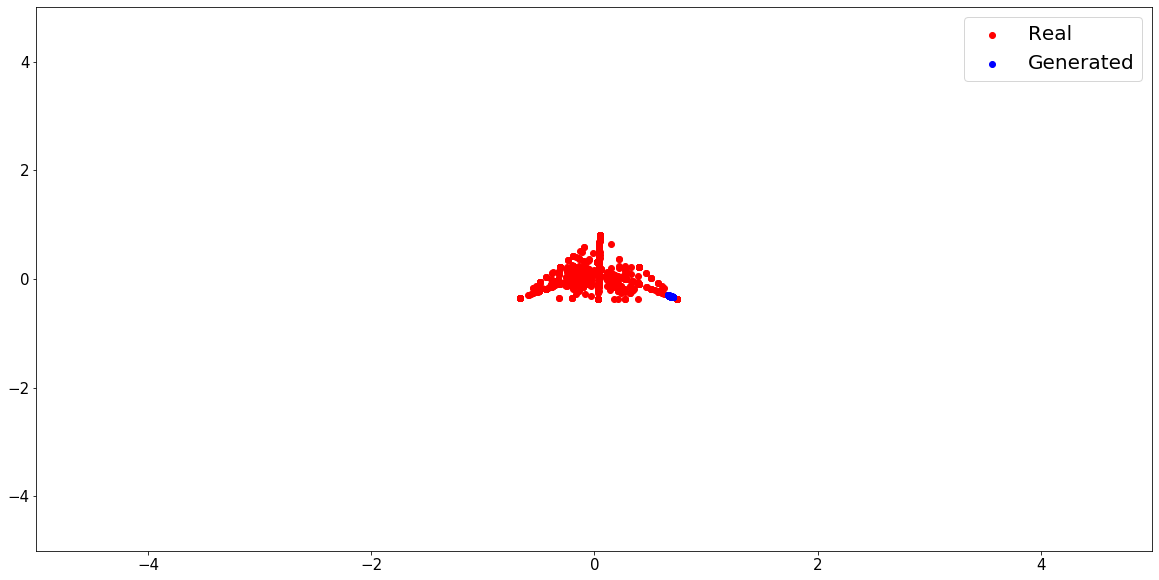

R2_work_at_computer [17870, 9269]


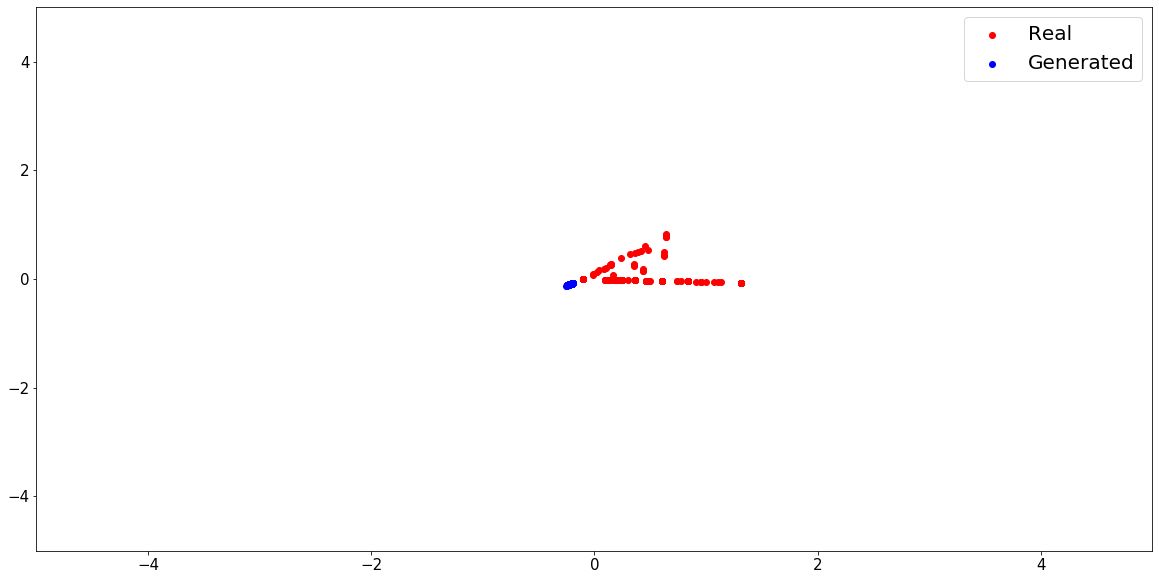

Wash_bathtub [17870, 9269]


In [32]:
classes = realData["ActivityName"].unique()
classes.sort()
for c in classes:
    X, y, _ = runPCA(c, [realData, fakeData], ["Real", "Generated"])
    plotPCA(X, y, lim=[-5, 5])

# DSADS

None [9120, 8503]


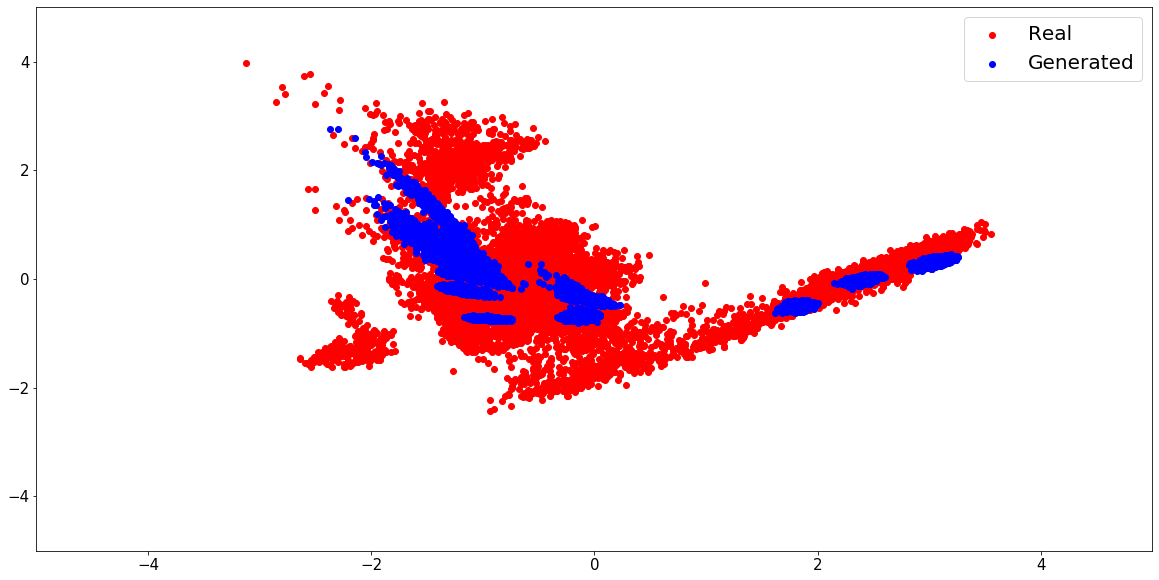

In [28]:
realData, fakeData = getData("DSADS")
X, y, _ = runPCA(None, [realData, fakeData], ["Real", "Generated"])
plotPCA(X, y, lim=[-5, 5])

ascending stairs [9120, 8503]


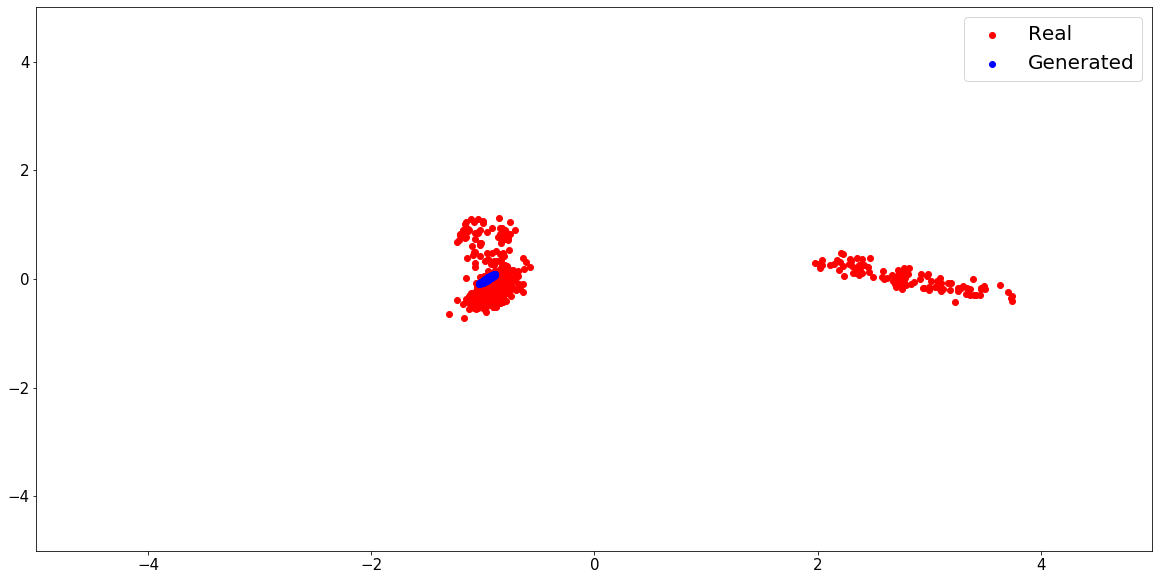

cycling on an exercise bike in horizontal positions [9120, 8503]
cycling on an exercise bike in vertical positions [9120, 8503]
descending stairs [9120, 8503]


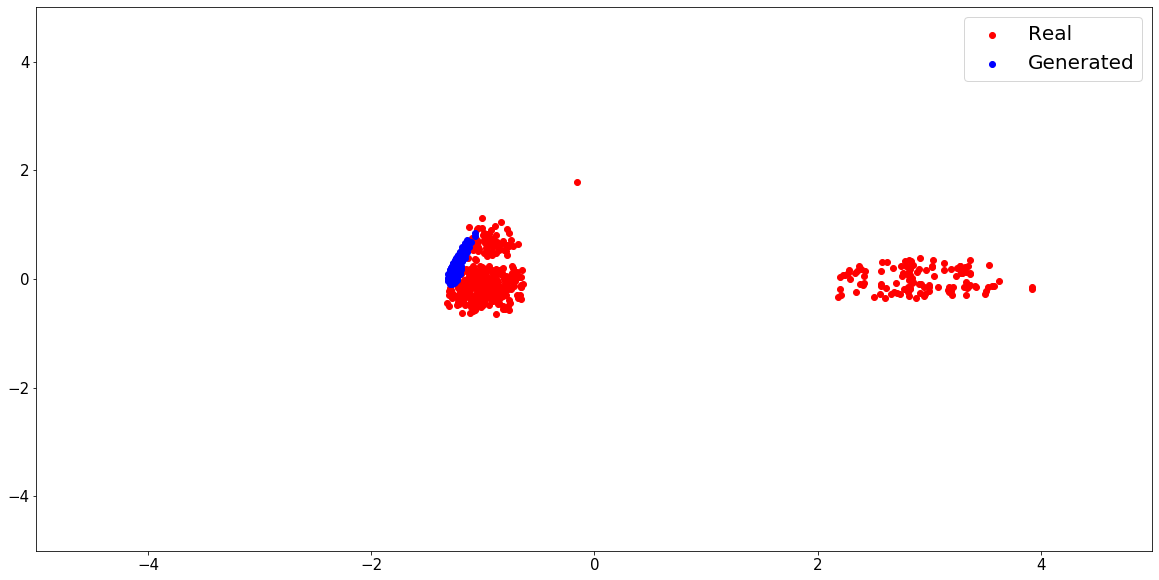

exercising on a cross trainer [9120, 8503]
exercising on a stepper [9120, 8503]


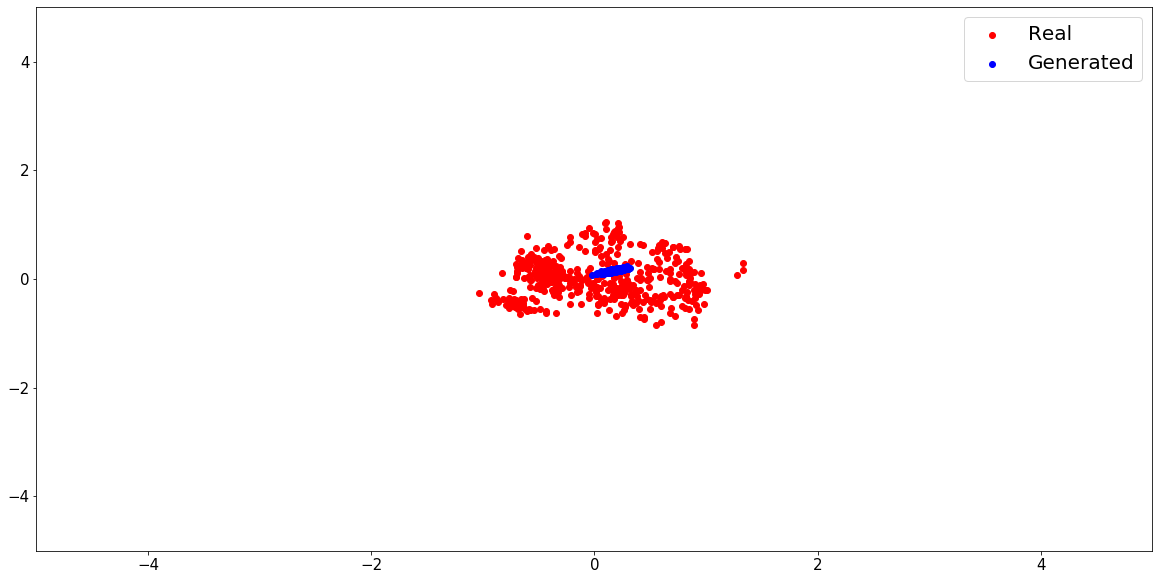

jumping [9120, 8503]


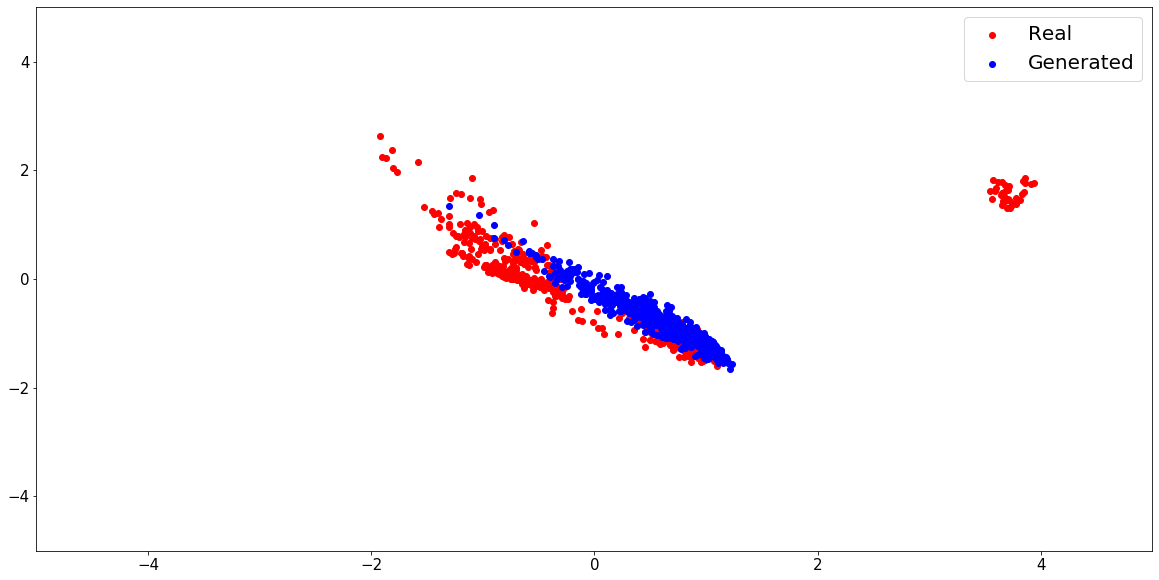

lying on back side [9120, 8503]


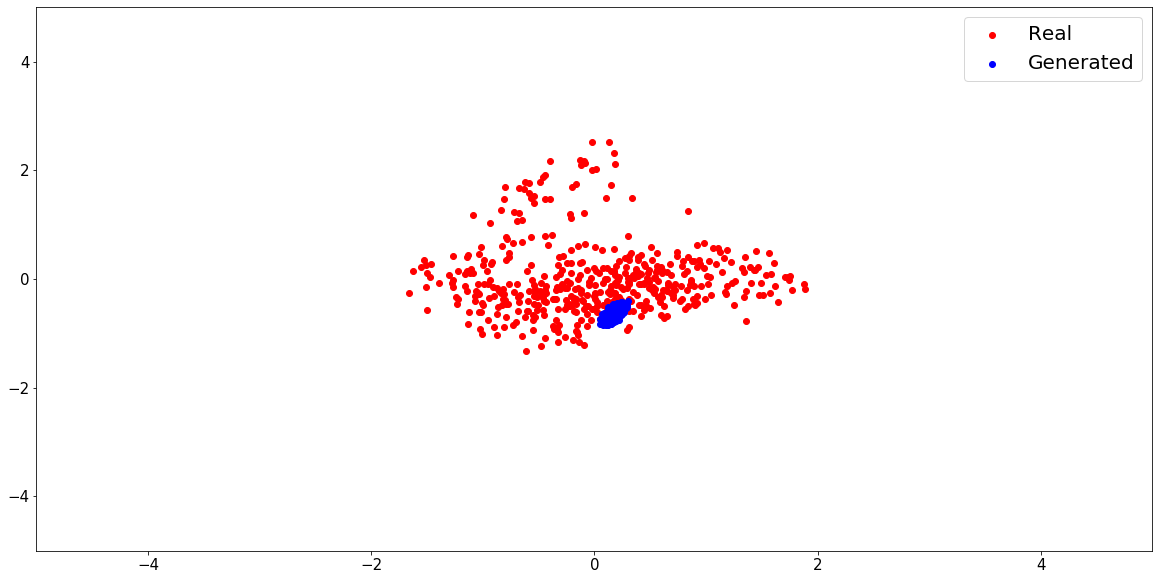

lying on right side [9120, 8503]


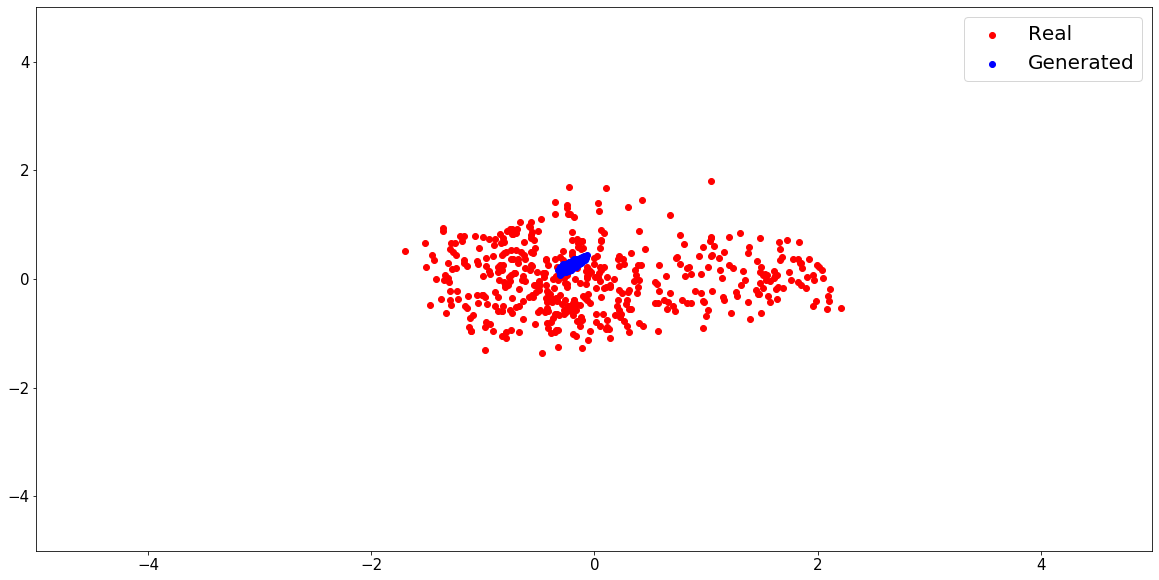

moving around in an elevator [9120, 8503]
playing basketball [9120, 8503]


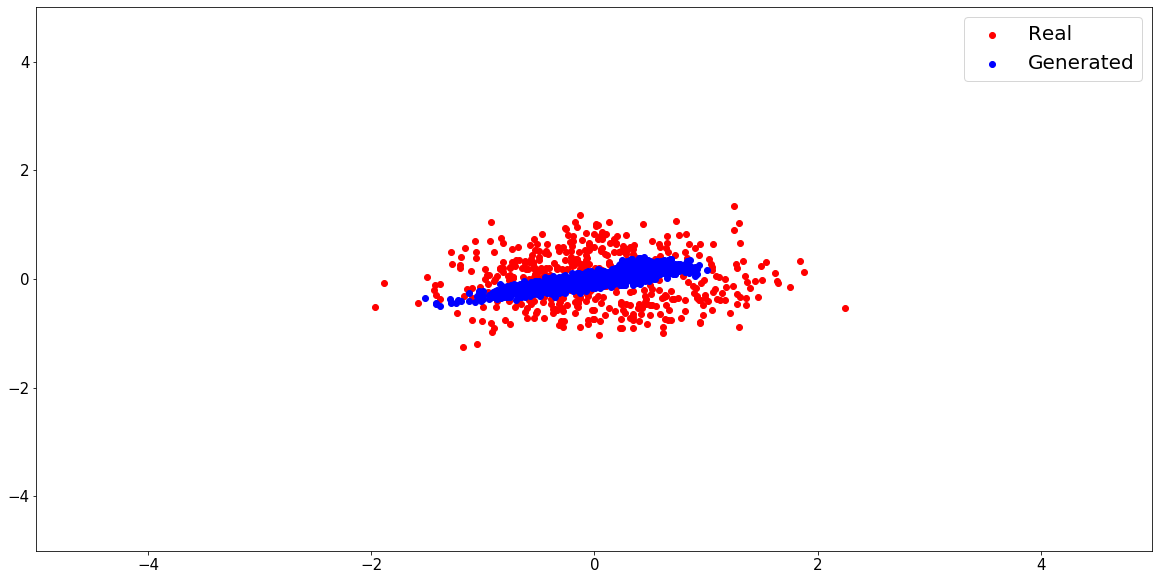

rowing [9120, 8503]


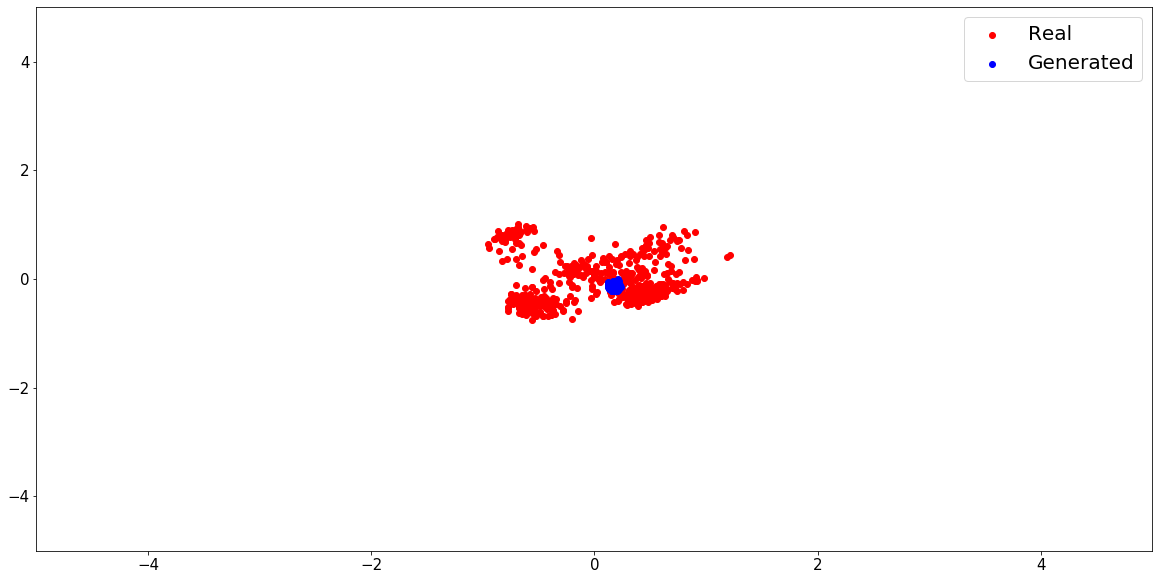

running on a treadmill3 [9120, 8503]
sitting [9120, 8503]


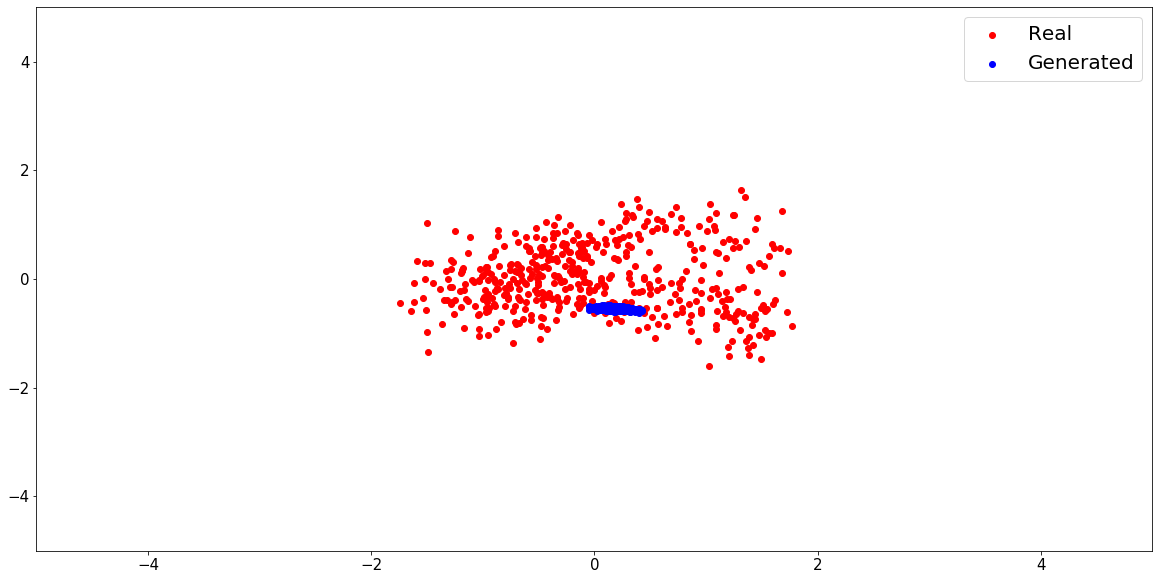

standing [9120, 8503]
standing in an elevator still [9120, 8503]
walking in a parking lot [9120, 8503]
walking on a treadmill1 [9120, 8503]
walking on a treadmill2 [9120, 8503]


In [29]:
classes = realData["ActivityName"].unique()
classes.sort()
for c in classes:
    X, y, _ = runPCA(c, [realData, fakeData], ["Real", "Generated"])
    plotPCA(X, y, lim=[-5, 5])

# PAMAP

In [8]:
realData, fakeDataSGCGAN = getData("PAMAP", "sg-cgan")
_, fakeDataMPGAN = getData("PAMAP", "mp-gan")
_, fakeDataMPWGAN = getData("PAMAP", "mp-wgan")
_, fakeDataSGCWGAN = getData("PAMAP", "sg-cwgan")


None [7312, 9540, 10000, 6000, 4000]


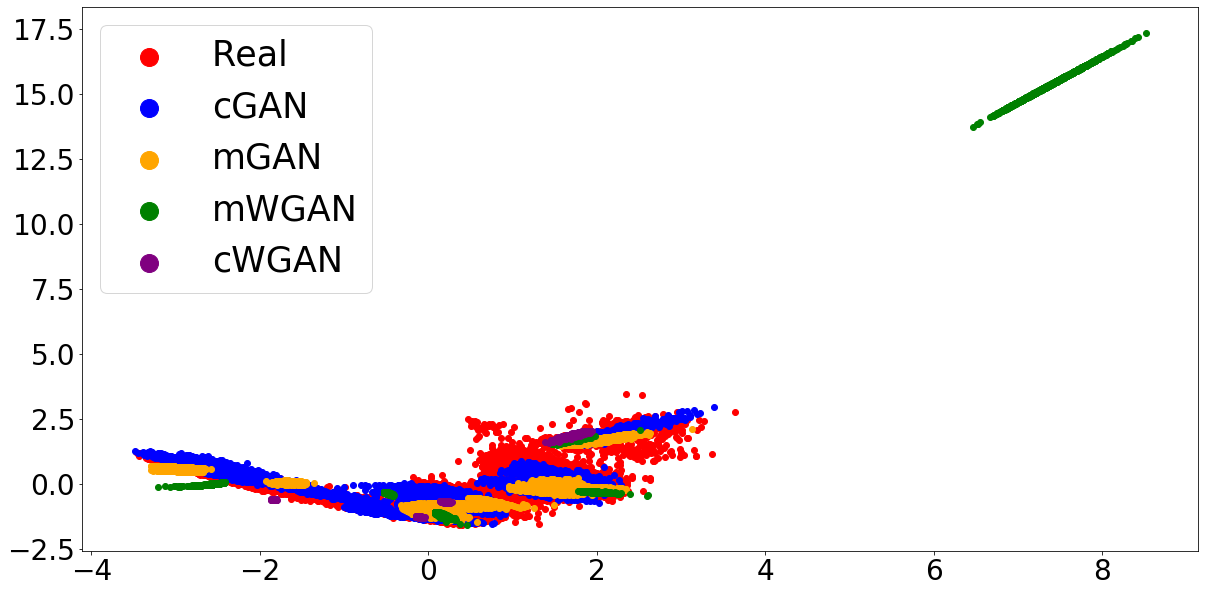

In [15]:
labels = ["Real", "cGAN", "mGAN", "mWGAN", "cWGAN"]
X, y, _ = runPCA(None, [realData, fakeDataSGCGAN, fakeDataMPGAN, fakeDataMPWGAN, fakeDataSGCWGAN], labels)
plotPCA(X, y, labels)

None [7312, 9540, 10000]


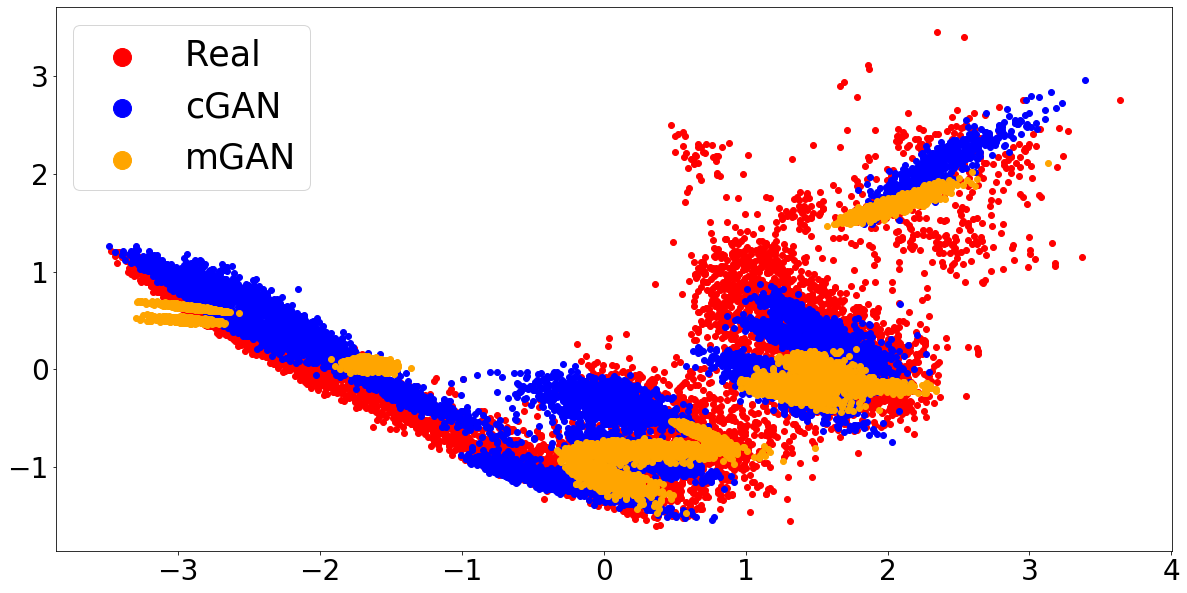

In [16]:
labels = ["Real", "cGAN", "mGAN"]
X, y, _ = runPCA(None, [realData, fakeDataSGCGAN, fakeDataMPGAN], labels)
plotPCA(X, y, labels)

['Nordic walking' 'ascending stairs' 'cycling' 'descending stairs'
 'ironing' 'lying' 'rope jumping' 'running' 'sitting' 'standing'
 'vacuum cleaning' 'walking']
vacuum cleaning [7312, 4000, 6000]


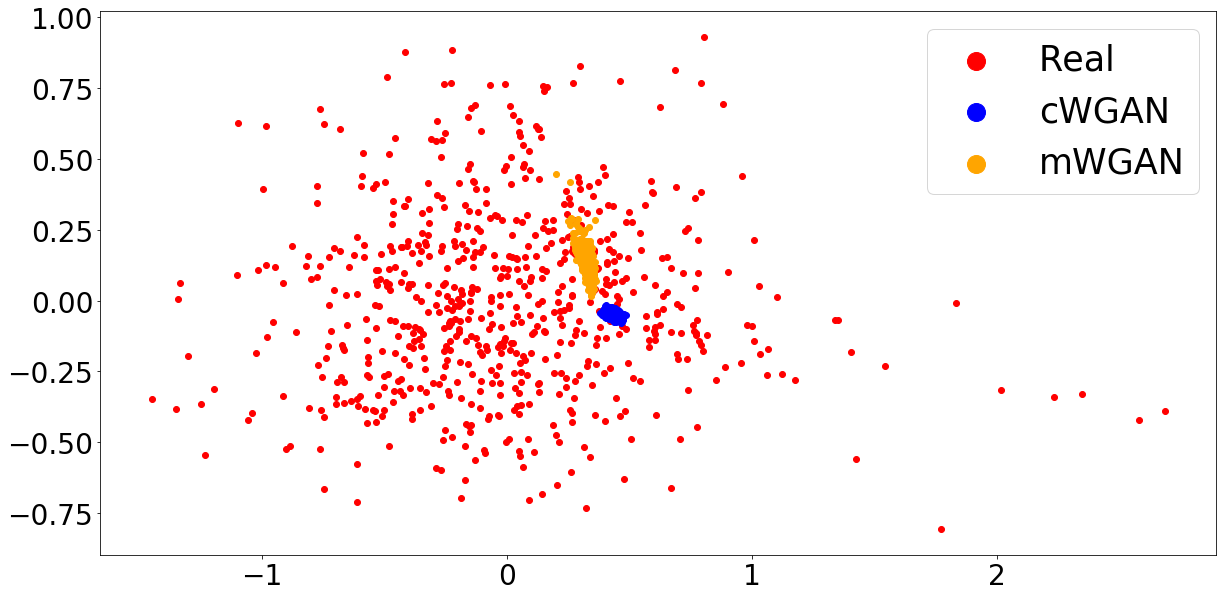

vacuum cleaning [7312, 9540, 10000]


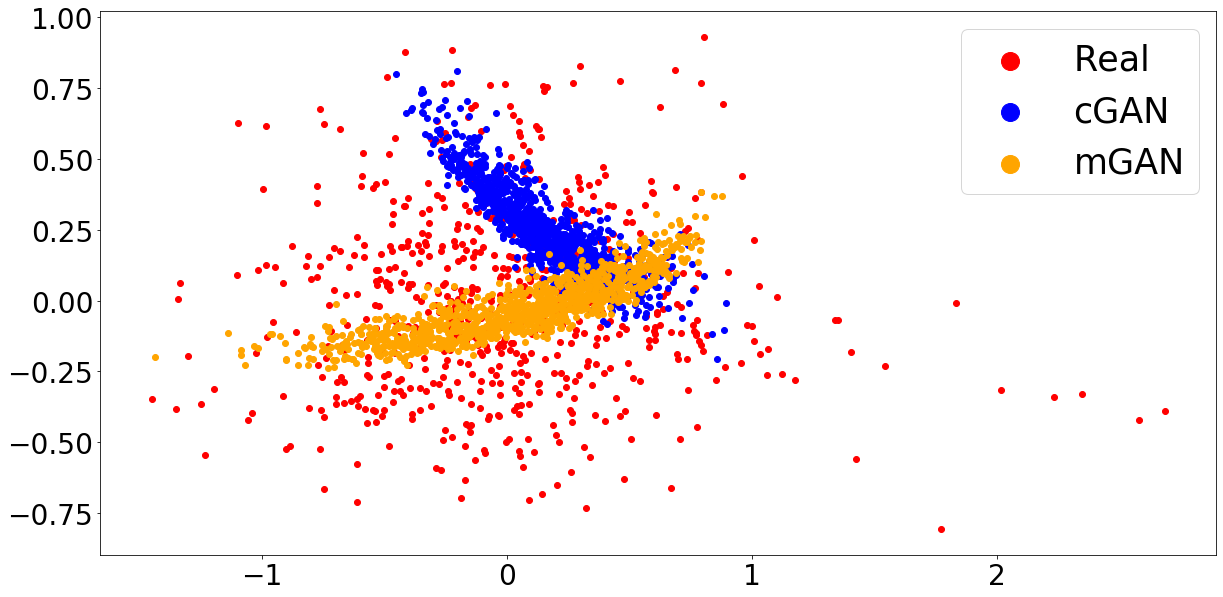

In [19]:
classes = realData["ActivityName"].unique()
classes.sort()
print(classes)
for c in ["vacuum cleaning"]:
    X, y, _ = runPCA(c, [realData, fakeDataSGCWGAN, fakeDataMPWGAN], ["Real", "cWGAN", "mWGAN"])
    plotPCA(X, y, ["Real", "cWGAN", "mWGAN"], filename="PCA-"+c+".pdf")
    
    X, y, _ = runPCA(c, [realData, fakeDataSGCGAN, fakeDataMPGAN], ["Real", "cGAN", "mGAN"])
    plotPCA(X, y, ["Real", "cGAN", "mGAN"], filename="PCA-WGAN-"+c+".pdf")